In [ ]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
tlt = yf.download("TLT", start="2004-01-01", end="2024-01-01")
spy = yf.download("SPY", start="2004-01-01", end="2024-01-01")
tlt = pd.DataFrame(tlt)
spy = pd.DataFrame(spy)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
tlt.reset_index(inplace = True)
spy.reset_index(inplace = True)

# Drop the 'Date' column instead of 'index'
tlt = tlt.drop('Date', axis = 1)
spy = spy.drop('Date', axis = 1)

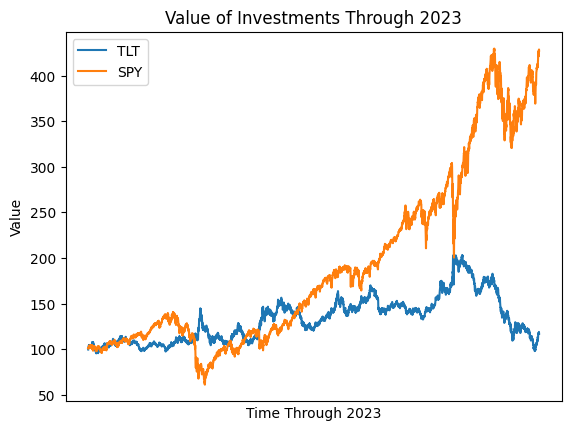

In [ ]:
#Invest $100 in each stock on Jan 5th and hold until Dec 30th - how do they move (close price)?
tlt['daily_close_return'] = tlt['Close'].pct_change() # Access 'Close' column using brackets
spy['daily_close_return'] = spy['Close'].pct_change() # Access 'Close' column using brackets

tlt.dropna(inplace = True)
spy.dropna(inplace = True)

tlt['returns_100'] = 100 * np.cumprod(tlt.daily_close_return + 1)
spy['returns_100'] = 100 * np.cumprod(spy.daily_close_return + 1)

# Create a range of indices to represent the time axis since 'Date' column was dropped
time_axis = range(len(tlt))

plt.plot(time_axis, tlt.returns_100) # Use the range of indices for x-axis
plt.plot(time_axis, spy.returns_100) # Use the range of indices for x-axis
plt.legend(['TLT', 'SPY']) # Update legend labels
plt.xticks([])
plt.title('Value of Investments Through 2023') # Update title
plt.xlabel('Time Through 2023') # Update x-axis label
plt.ylabel('Value')
plt.show()

In [ ]:
#Mean and standard deviation of both
print(('Mean of TLT: ' + str(round((tlt.returns_100.values[-1] - 100) / 100, 2))))
print('Standard Deviation of TLT: ' + str(round(np.std(tlt.daily_close_return) * np.sqrt(len(tlt.daily_close_return)), 2)))

print(('Mean of SPY: ' + str(round((spy.returns_100.values[-1] - 100) / 100, 2))))
print('Standard Deviation of SPY: ' + str(round(np.std(spy.daily_close_return) * np.sqrt(len(spy.daily_close_return)), 2)))

Mean of TLT: 0.17
Standard Deviation of TLT: 0.65
Mean of SPY: 3.27
Standard Deviation of SPY: 0.85


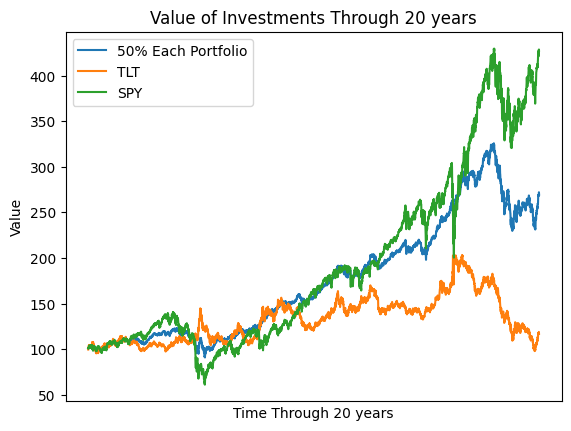

In [ ]:
#50% weighting to each stock
# Reset index to create a default numerical index
tlt.reset_index(inplace=True)
spy.reset_index(inplace=True)

df_tlt_spy = pd.concat([tlt[['index', 'returns_100']], spy.returns_100], axis = 1) # Now 'index' column exists
df_tlt_spy.columns = ['date', 'TLT', 'SPY']
df_tlt_spy.TLT = df_tlt_spy.TLT.pct_change()
df_tlt_spy.SPY = df_tlt_spy.SPY.pct_change()
df_tlt_spy = df_tlt_spy.dropna()
df_tlt_spy['port_return'] = 0.5 * df_tlt_spy.TLT + 0.5 * df_tlt_spy.SPY
df_tlt_spy['port_return_100'] = 100 * np.cumprod(df_tlt_spy.port_return + 1)
plt.plot(df_tlt_spy.date, df_tlt_spy.port_return_100)
plt.plot(tlt.returns_100)
plt.plot(spy.returns_100)
plt.legend(['50% Each Portfolio', 'TLT', 'SPY'])
plt.xticks([])
plt.title('Value of Investments Through 20 years')
plt.xlabel('Time Through 20 years')
plt.ylabel('Value')
plt.show()

In [ ]:
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "BRK.B", "JNJ", "V",
    "WMT", "JPM", "PG", "UNH", "DIS", "HD", "MA", "PYPL", "NFLX", "NKE",
    "PEP", "KO", "PFE", "CSCO", "XOM", "CVX", "MRK", "BA", "INTC", "T",
    "ABBV", "COST", "MCD", "CRM", "ORCL", "WFC", "ABT", "AMD", "BABA", "SBUX",
    "GS", "HON", "VZ", "IBM", "GE", "AMGN", "QCOM", "C", "SPG", "TXN"
]

year = 2019
month = 1
day = 1

In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00


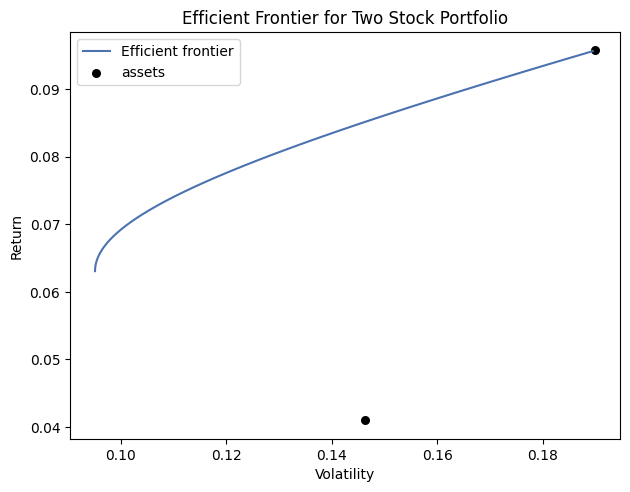

In [ ]:
# Generate efficient frontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

# Assuming 'Adj Close' is the intended column for closing prices:
df_TLT_SPY = pd.concat([tlt[['Adj Close']], spy['Adj Close']], axis=1)  # Use 'Adj Close' instead of 'close'
df_TLT_SPY.columns = ['TLT', 'SPY']
mu = mean_historical_return(df_TLT_SPY)
S = sample_cov(df_TLT_SPY)

ef = EfficientFrontier(mu, S)
print(ef)
plotting.plot_efficient_frontier(ef)
plt.title('Efficient Frontier for Two Stock Portfolio')
plt.show()

In [ ]:
SPY = yf.download("SPY", start="2004-01-01", end="2024-01-01")
TLT = yf.download("TLT", start="2004-01-01", end="2024-01-01")
data = pd.DataFrame(SPY)
data['SPY'] = data["Adj Close"]
data.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], inplace = True)
data['TLT'] = TLT["Adj Close"]
data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,SPY,TLT
Date,,
2004-01-02,75.387581,43.432175
2004-01-05,76.207642,43.318985
2004-01-06,76.282211,43.797333
2004-01-07,76.539787,43.972240
2004-01-08,76.844757,43.956802
...,...,...
2023-12-22,470.664490,96.234627
2023-12-26,472.651886,96.508232
2023-12-27,473.506470,98.218330


Text(0, 0.5, 'price in $')

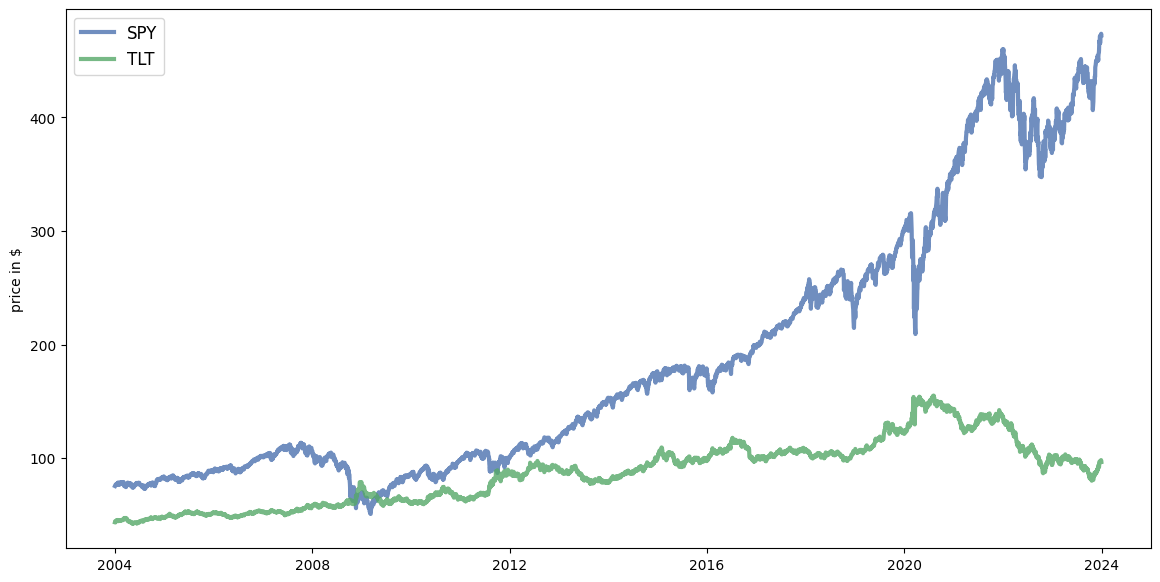

In [ ]:
plt.figure(figsize=(14, 7))
for c in data.columns.values:
    plt.plot(data.index, data[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

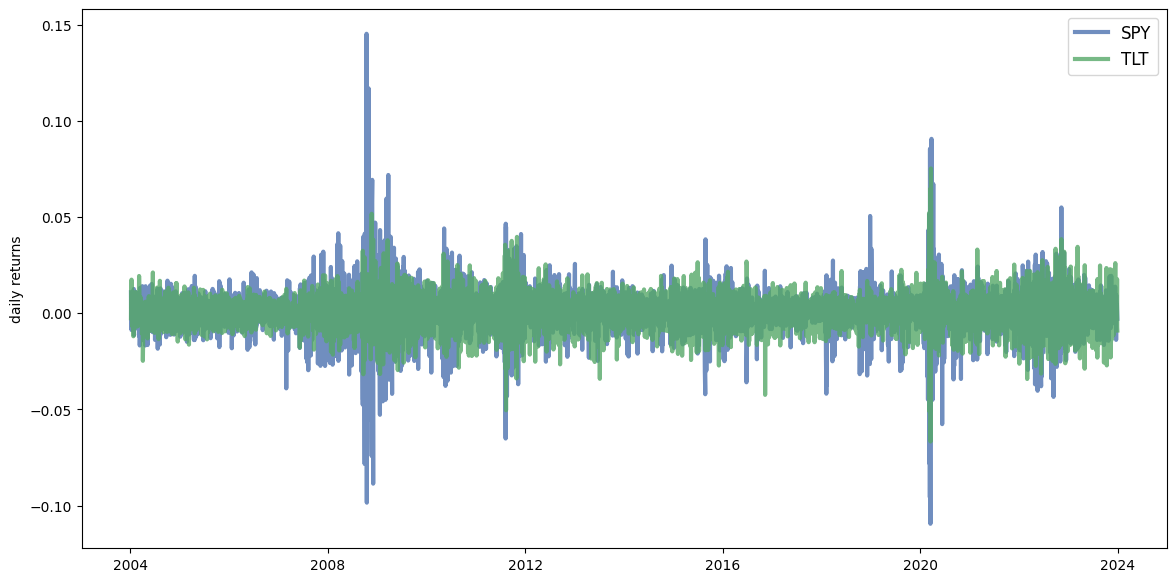

In [ ]:
returns = data.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    # Get the number of assets
    num_assets = len(mean_returns)  # Determine the number of assets from mean_returns

    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)  # Use num_assets to generate weights
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [ ]:
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 100000
risk_free_rate = 0.0178

In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index= data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.08
Annualised Volatility: 0.1


              SPY    TLT
allocation  52.76  47.24
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.1


              SPY    TLT
allocation  40.32  59.68


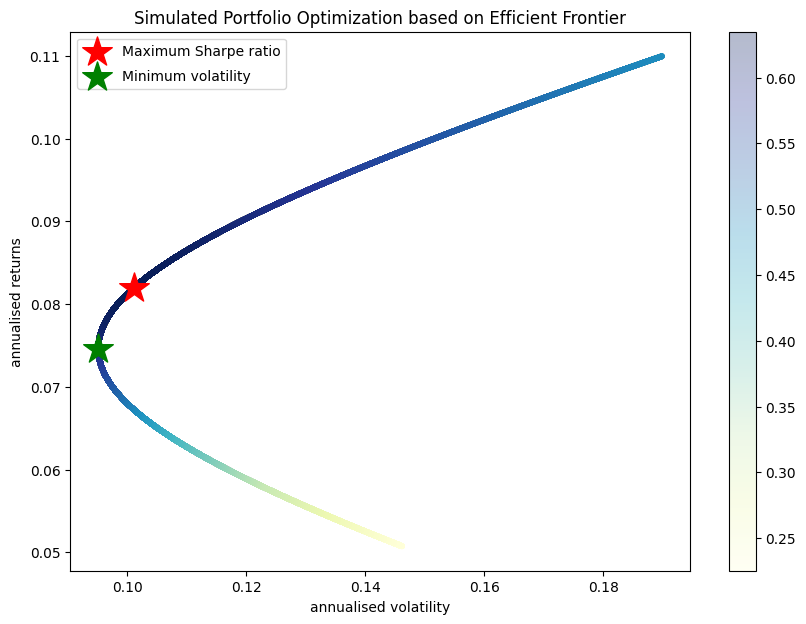

In [ ]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)